# Regression: Boston house prices

We will use the Boston house prices dataset (figuring as regression example in ISLR - http://www-bcf.usc.edu/~gareth/ISL/) to examine different types of regression.
The Boston house prices dataset is conveniently included in scikit-learn.


## Load and inspect the data

In [1]:
# the usual imports
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
 boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [4]:
features = boston.feature_names
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [9]:
boston.DESCR

"Boston House Prices dataset\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  pupil-teac

In [10]:
boston.data.shape

(506, 13)

In [12]:
X = boston.data
y = boston.target

While the data is already in the required form for scikit-learn estimators (i.e., numpy arrays), we build a pandas DataFrame for convenient data exploration.

In [13]:
df = pd.DataFrame(X, columns = features)
df['MEDV'] = pd.Series(y)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We check for categorical variables that - if they exist - have to be encoded.

In [14]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd109c9290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7efd102c15d0>]], dtype=object)

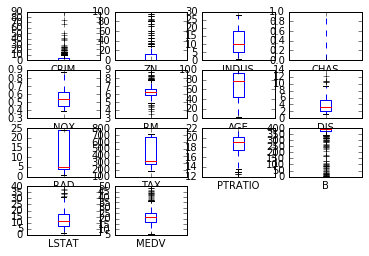

In [17]:
df.plot.box(subplots=True, sharex=False, sharey = False, layout=(4,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd0f349c90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7efd0ec82550>]], dtype=object)

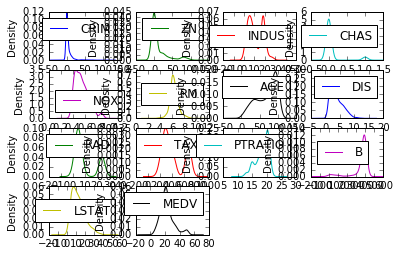

In [19]:
df.plot.kde(subplots=True, sharex=False, sharey = False, layout=(4,4))

## Check for correlated predictors (collinearity) and inspect predictor-target correlations

In [20]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


For visual inspection of predictor intercorrelations, we will constrain output to just columns that are correlated with at least one other predictor by at least 0.5.

In [21]:
correlations_gt_05 = df.corr().where(abs(df.corr()) > 0.5, np.NaN)
correlations_gt_05

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.622029,0.579564,NaN,NaN,NaN,NaN
ZN,NaN,1.000000,-0.533828,NaN,-0.516604,NaN,-0.569537,0.664408,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,-0.533828,1.000000,NaN,0.763651,NaN,0.644779,-0.708027,0.595129,0.720760,NaN,NaN,0.603800,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,-0.516604,0.763651,NaN,1.000000,NaN,0.731470,-0.769230,0.611441,0.668023,NaN,NaN,0.590879,NaN
RM,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.613808,0.695360
AGE,NaN,-0.569537,0.644779,NaN,0.731470,NaN,1.000000,-0.747881,NaN,0.506456,NaN,NaN,0.602339,NaN
DIS,NaN,0.664408,-0.708027,NaN,-0.769230,NaN,-0.747881,1.000000,NaN,-0.534432,NaN,NaN,NaN,NaN
RAD,0.622029,NaN,0.595129,NaN,0.611441,NaN,NaN,NaN,1.000000,0.910228,NaN,NaN,NaN,NaN
TAX,0.579564,NaN,0.720760,NaN,0.668023,NaN,0.506456,-0.534432,0.910228,1.000000,NaN,NaN,0.543993,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd0ab72f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7efd0261d810>]], dtype=object)

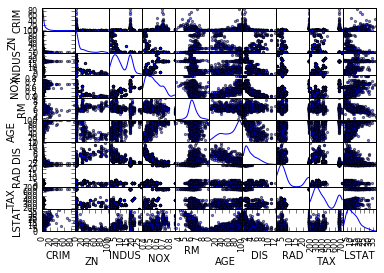

In [23]:
from pandas.tools.plotting import scatter_matrix
cols_gt_05 = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','LSTAT']
# scattermatrix of just
scatter_matrix(df[cols_gt_05], diagonal='kde')

Analogously, for correlations of the predictors with the target variable, we just look at correlations >= 0.5:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd00d458d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7efd0060e190>]], dtype=object)

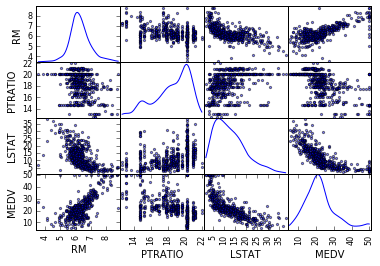

In [25]:
cols_gt_05_medv = ['RM','PTRATIO','LSTAT', 'MEDV']
scatter_matrix(df[cols_gt_05_medv], diagonal='kde')

The seaborn library has a heatmap function that allows to nicely visualize correlation intensities.

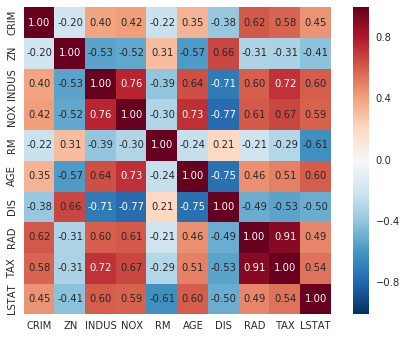

In [26]:
import seaborn as sns
plt.figure()
coefs = np.corrcoef(df[cols_gt_05].values.T)
sns.set(style='whitegrid')
hm = sns.heatmap(coefs, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols_gt_05, xticklabels=cols_gt_05) 
plt.show()
sns.reset_orig()

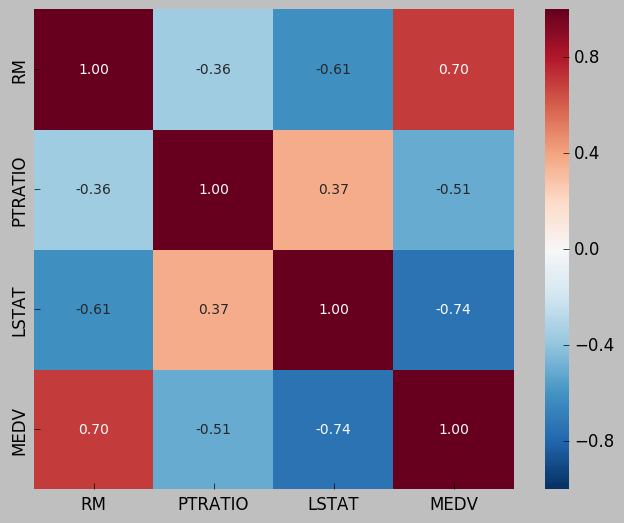

In [27]:
plt.figure()
coefs = np.corrcoef(df[cols_gt_05_medv].values.T)
hm = sns.heatmap(coefs, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols_gt_05_medv, xticklabels=cols_gt_05_medv) 
plt.show()
sns.reset_orig()

## Check for missing values

In [28]:
np.all(df[df.notnull()] == df)

True

## Split into training and test set

In [29]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(boston.data, boston.target, test_size=0.2, random_state=0)


In [30]:
X_train[:2]

array([[  3.58090000e-01,   0.00000000e+00,   6.20000000e+00,
          1.00000000e+00,   5.07000000e-01,   6.95100000e+00,
          8.85000000e+01,   2.86170000e+00,   8.00000000e+00,
          3.07000000e+02,   1.74000000e+01,   3.91700000e+02,
          9.71000000e+00],
       [  1.58760000e-01,   0.00000000e+00,   1.08100000e+01,
          0.00000000e+00,   4.13000000e-01,   5.96100000e+00,
          1.75000000e+01,   5.28730000e+00,   4.00000000e+00,
          3.05000000e+02,   1.92000000e+01,   3.76940000e+02,
          9.88000000e+00]])

In [31]:
y_train[:2]

array([ 26.7,  21.7])

## Standardize

In [33]:
from sklearn import preprocessing
#fit the scaler on training set and apply same to test set
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scaler.mean_, scaler.scale_

(array([ -2.33998739e-16,  -6.23813432e-17,   2.69916103e-15,
         -3.95723058e-17,  -9.89857261e-16,  -1.47571724e-15,
          8.65918998e-16,   2.00884414e-16,  -1.18716917e-16,
          2.91296140e-17,   1.65098958e-14,   7.99759049e-15,
         -1.85852434e-15]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]))

In [34]:
X_train[:2]

array([[-0.36984756, -0.49960763, -0.70492455,  3.66450153, -0.42487874,
         0.93567804,  0.69366877, -0.4372179 , -0.16224243, -0.56165616,
        -0.48463784,  0.3716906 , -0.41100022],
       [-0.39439298, -0.49960763, -0.04487755, -0.27288841, -1.24185891,
        -0.49118121, -1.8355285 ,  0.73005474, -0.62464765, -0.57337637,
         0.33649132,  0.20501196, -0.38768057]])

## Linear Regression

In [35]:
from sklearn import linear_model
lreg_model = linear_model.LinearRegression()
lreg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
lreg_model.coef_

array([-0.96159409,  1.05656121,  0.04090558,  0.59488677, -1.85972668,
        2.5681145 , -0.08549475, -2.88145804,  2.1088358 , -1.87464517,
       -2.29511322,  0.72792395, -3.59864933])

In [44]:
lreg_model.intercept_

22.611881188118808

In [45]:
from sklearn import metrics
def eval_performance(model, X_train, y_train, X_test, y_test):
  
  print("\nEvaluating model: %s" % model)
  
  predictions_train = model.predict(X_train)
  residuals_train = predictions_train - y_train
  predictions_test = model.predict(X_test)
  residuals_test = predictions_test - y_test
  
  # RSS 
  RSS_train = (residuals_train ** 2).sum()
  RSS_test = (residuals_test ** 2).sum()
  print("Residual sum of squares (train): %d" % RSS_train)
  print("Residual sum of squares (test): %d" % RSS_test)
  
  # Mean squared error
  print('MSE (train): %.2f' % metrics.mean_squared_error(y_train, predictions_train))
  print('MSE (test): %.2f' % metrics.mean_squared_error(y_test, predictions_test))
  
  # R^2 = 1 - (residual sum of squares / total sum of squares) = 1 - MSE/Var(y)
  print('R^2 (train): %.2f' % model.score(X_train, y_train))
  print('R^2 (test): %.2f\n' % model.score(X_test, y_test))

$ R^2 = 1 - \dfrac{MSE}{Var(Y)} $


In [46]:
eval_performance(lreg_model, X_train, y_train, X_test, y_test)


Evaluating model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Residual sum of squares (train): 7809
Residual sum of squares (test): 3411
MSE (train): 19.33
MSE (test): 33.45
R^2 (train): 0.77
R^2 (test): 0.59



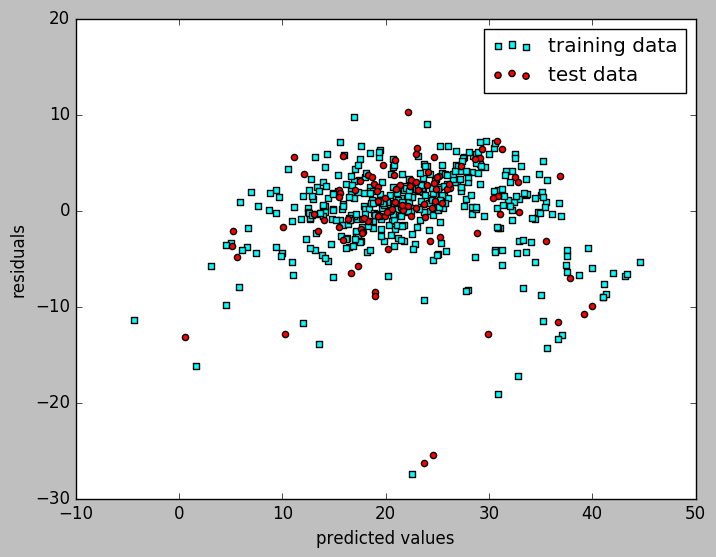

In [47]:
  predictions_train = lreg_model.predict(X_train)
  residuals_train = predictions_train - y_train
  predictions_test = lreg_model.predict(X_test)
  residuals_test = predictions_test - y_test    
  plt.figure()
  plt.scatter(predictions_train, residuals_train, c='cyan', marker='s', label='training data')
  plt.scatter(predictions_test, residuals_test, c='red', marker='o', label='test data')
  plt.legend()
  plt.xlabel('predicted values')
  plt.ylabel('residuals')
  plt.show()

So we have regression coefficients and know how well the model overall performs on the test set.
However, for explanatory power we are interested in isolating the most important predictors.
We can proceed in (at least) two ways. 
Firstly, we may use the statsmodels library to obtain p values for single coefficients. 

## Linear Regression using statsmodels

In [48]:
import statsmodels.api as sm
sm_linear = sm.OLS(y_train, X_train)
sm_results = sm_linear.fit()
print sm_results.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.730
Date:                Tue, 23 Aug 2016   Prob (F-statistic):           1.24e-05
Time:                        10:52:54   Log-Likelihood:                -1840.6
No. Observations:                 404   AIC:                             3707.
Df Residuals:                     391   BIC:                             3759.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.9616      1.550     -0.620      0.5

According to statsmodels, none of the coefficient is significant by itself (while the whole model is).
A different way to home in on important predictors is using regularization.
We start with Ridge Regression, which minimizes [RSS + the L2 norm].


## Ridge Regression

In [49]:
alphas = np.logspace(-5, 4, 50)

ridge_model_cv = linear_model.RidgeCV(alphas=alphas, store_cv_values=True)
ridge_model_cv.fit(X_train, y_train)  
print('Coefficients: \n', ridge_model_cv.coef_)

eval_performance(ridge_model_cv, X_train, y_train, X_test, y_test)
print('Best ridge alpha: {}\n'.format(ridge_model_cv.alpha_)) 

('Coefficients: \n', array([-0.90691585,  0.95235576, -0.11838281,  0.62036976, -1.62673793,
        2.63392723, -0.13322781, -2.65395682,  1.64242371, -1.46338818,
       -2.23011576,  0.7285696 , -3.48344022]))

Evaluating model: RidgeCV(alphas=array([  1.00000e-05,   1.52642e-05,   2.32995e-05,   3.55648e-05,
         5.42868e-05,   8.28643e-05,   1.26486e-04,   1.93070e-04,
         2.94705e-04,   4.49843e-04,   6.86649e-04,   1.04811e-03,
         1.59986e-03,   2.44205e-03,   3.72759e-03,   5.68987e-03,
         8.68511e-03,   1...     1.20679e+03,   1.84207e+03,   2.81177e+03,   4.29193e+03,
         6.55129e+03,   1.00000e+04]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)
Residual sum of squares (train): 7830
Residual sum of squares (test): 3476
MSE (train): 19.38
MSE (test): 34.08
R^2 (train): 0.77
R^2 (test): 0.58

Best ridge alpha: 7.54312006335



The "best alpha" chosen by ridge regression does not really shrink coefficients much.
Let's visually inspect the coefficient path when increasing alpha:

In [50]:
from cycler import cycler
def coefficient_path(model, alphas, X, y):
  model = model
  coefs = []
  for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
  plt.figure()
  ax = plt.gca()
  ax.set_prop_cycle(cycler('color', ['c', 'm', 'y', 'k', 'b', 'r', 'y', 'g']))
  ax.plot(alphas, coefs)
  ax.set_xscale('log')
  ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
  plt.xlabel('alpha')
  plt.ylabel('weights')
  plt.title('Coefficients as a function of the regularization')
  plt.axis('tight')
  plt.show()

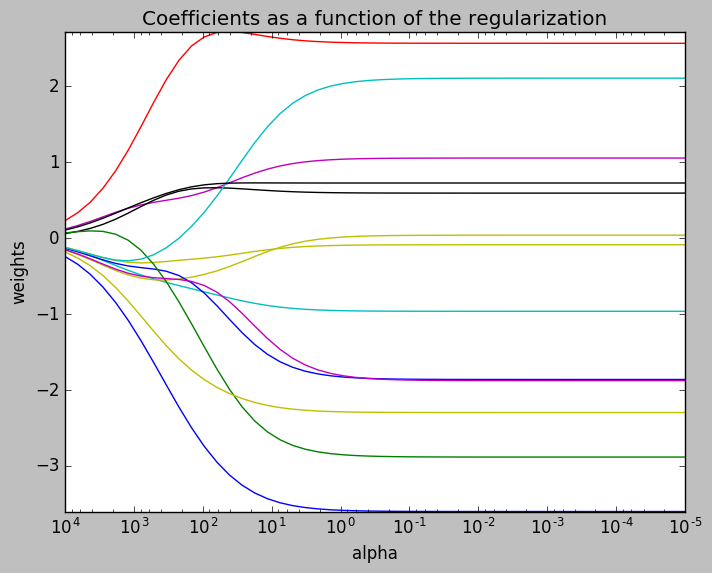

In [51]:
coefficient_path(linear_model.Ridge(), alphas, X_train, y_train)

Let's check which coefficients have greatest values at alpha=100:

In [52]:
ridge_model = linear_model.Ridge(alpha = 100)
ridge_model.fit(X_train, y_train)  
print('Coefficients: \n', ridge_model.coef_)

eval_performance(ridge_model, X_train, y_train, X_test, y_test)

('Coefficients: \n', array([-0.70089511,  0.60243738, -0.48066483,  0.66286903, -0.7037169 ,
        2.64170022, -0.2629907 , -1.3932343 ,  0.3202889 , -0.61358403,
       -1.84774208,  0.70133907, -2.71332042]))

Evaluating model: Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Residual sum of squares (train): 8549
Residual sum of squares (test): 3926
MSE (train): 21.16
MSE (test): 38.50
R^2 (train): 0.75
R^2 (test): 0.53



In contrast to Ridge Regression, the Lasso actually shrinks coefficients to 0, by minimizing [RSS + the L1 norm].

## Lasso 

('Coefficients: \n', array([-0.92092347,  1.00974796, -0.        ,  0.59485794, -1.79386678,
        2.58518634, -0.06133208, -2.78359914,  1.90612715, -1.70003096,
       -2.27764442,  0.7109501 , -3.60448142]))

Evaluating model: LassoCV(alphas=array([  1.00000e-05,   1.52642e-05,   2.32995e-05,   3.55648e-05,
         5.42868e-05,   8.28643e-05,   1.26486e-04,   1.93070e-04,
         2.94705e-04,   4.49843e-04,   6.86649e-04,   1.04811e-03,
         1.59986e-03,   2.44205e-03,   3.72759e-03,   5.68987e-03,
         8.68511e-03,   1...     1.20679e+03,   1.84207e+03,   2.81177e+03,   4.29193e+03,
         6.55129e+03,   1.00000e+04]),
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
Residual sum of squares (train): 7812
Residual sum of squares (test): 3431
MSE (train): 19.34
MSE (test): 33.64
R^2 (train): 0.77

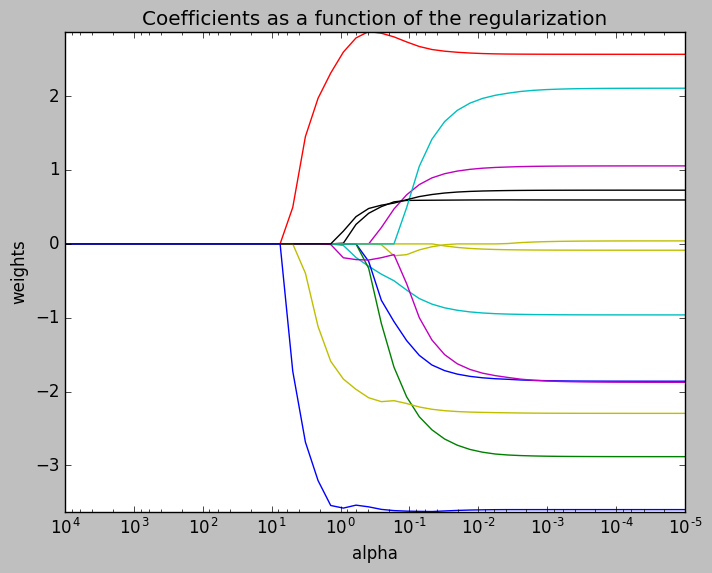

In [53]:
lasso_model_cv = linear_model.LassoCV(alphas=alphas)
lasso_model_cv.fit(X_train, y_train)  

print('Coefficients: \n', lasso_model_cv.coef_)
eval_performance(lasso_model_cv, X_train, y_train, X_test, y_test)
print('Best Lasso alpha: {}\n'.format(lasso_model_cv.alpha_)) 

coefficient_path(linear_model.Lasso(), alphas, X_train, y_train)

At alpha = 2, 3 coefficients are chosen:

In [58]:
lasso_model = linear_model.Lasso(alpha = 2)
lasso_model.fit(X_train, y_train)  
print('Coefficients: \n', lasso_model.coef_)

eval_performance(lasso_model, X_train, y_train, X_test, y_test)

('Coefficients: \n', array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.02893504, -0.        ,  0.        , -0.        , -0.        ,
       -1.1973605 ,  0.        , -3.26178639]))

Evaluating model: Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Residual sum of squares (train): 12119
Residual sum of squares (test): 4218
MSE (train): 30.00
MSE (test): 41.36
R^2 (train): 0.65
R^2 (test): 0.49



Looking back at the scatter matrices, we see that LSTAT does not look to be linearly correlated with MEDV.
Let's try different degrees of polynomials of LSTAT, omitting the rest of the variables.

## Polynomial Regression

In [67]:
# use just LSTAT
X_train_lstat_poly_1 = X_train[:,12:13]

poly_2 = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly_3 = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
poly_4 = preprocessing.PolynomialFeatures(degree=4, include_bias=False)

X_train_lstat_poly_2 = poly_2.fit_transform(X_train_lstat_poly_1)
X_train_lstat_poly_3 = poly_3.fit_transform(X_train_lstat_poly_1)
X_train_lstat_poly_4 = poly_4.fit_transform(X_train_lstat_poly_1)

In [68]:
print X_train_lstat_poly_2[:1,:]
print poly_2.n_output_features_
print poly_2.powers_
print X_train_lstat_poly_3[:1,:]
print poly_3.n_output_features_
print poly_3.powers_
print X_train_lstat_poly_4[:1,:]
print poly_4.n_output_features_
print poly_4.powers_

[[-0.41100022  0.16892118]]
2
[[1]
 [2]]
[[-0.41100022  0.16892118 -0.06942664]]
3
[[1]
 [2]
 [3]]
[[-0.41100022  0.16892118 -0.06942664  0.02853436]]
4
[[1]
 [2]
 [3]
 [4]]


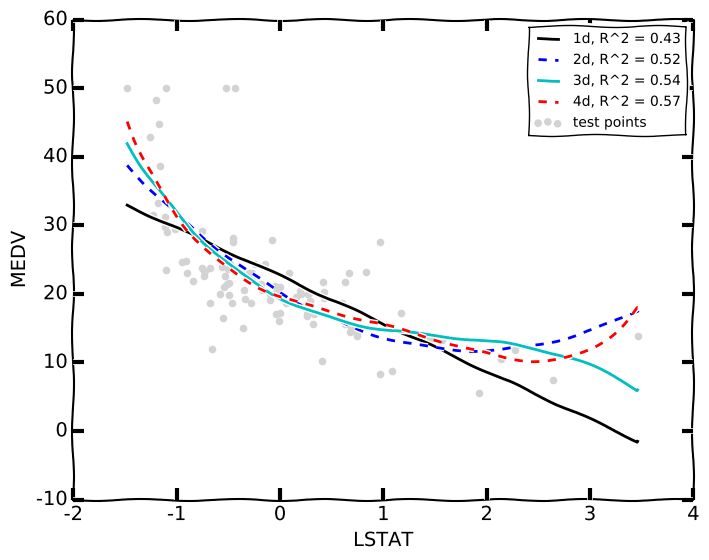

In [69]:
X_range = np.arange(X_test[:,12:13].min(), X_test[:,12:13].max(), 0.01)[:, np.newaxis]

lreg_model = linear_model.LinearRegression()

lreg_model.fit(X_train_lstat_poly_1, y_train)
poly_1_prediction_curve = lreg_model.predict(X_range)
r2_score_1 = metrics.r2_score(y_test, lreg_model.predict(X_test[:,12:13]))

lreg_model.fit(X_train_lstat_poly_2, y_train)
poly_2_prediction_curve = lreg_model.predict(poly_2.transform(X_range))
r2_score_2 = metrics.r2_score(y_test, lreg_model.predict(poly_2.transform(X_test[:,12:13])))

lreg_model.fit(X_train_lstat_poly_3, y_train)
poly_3_prediction_curve = lreg_model.predict(poly_3.transform(X_range))
r2_score_3 = metrics.r2_score(y_test, lreg_model.predict(poly_3.transform(X_test[:,12:13])))

lreg_model.fit(X_train_lstat_poly_4, y_train)
poly_4_prediction_curve = lreg_model.predict(poly_4.transform(X_range))
r2_score_4 = metrics.r2_score(y_test, lreg_model.predict(poly_4.transform(X_test[:,12:13])))

plt.figure()
plt.scatter(X_test[:,12:13], y_test, label='test points', color='lightgray')
plt.plot(X_range, poly_1_prediction_curve, label='1d, R^2 = %.2f' % r2_score_1, color='k', linestyle='-')
plt.plot(X_range, poly_2_prediction_curve, label='2d, R^2 = %.2f' % r2_score_2, color='b', linestyle='--')
plt.plot(X_range, poly_3_prediction_curve, label='3d, R^2 = %.2f' % r2_score_3, color='c', linestyle='-')
plt.plot(X_range, poly_4_prediction_curve, label='4d, R^2 = %.2f' % r2_score_4, color='r', linestyle='--')
plt.xlabel ('LSTAT')
plt.ylabel('MEDV')
plt.legend(fontsize=10)
plt.show()

# Overfitting

What happens if we chose a REALLY high-degree polynomial? ;-)

In [70]:
poly_16 = preprocessing.PolynomialFeatures(degree=16, include_bias=False)
X_train_lstat_poly_16 = poly_16.fit_transform(X_train_lstat_poly_1)

lreg_model = linear_model.LinearRegression()
lreg_model.fit(X_train_lstat_poly_16, y_train)
print('Coefficients: \n', lreg_model.coef_)
eval_performance(lreg_model, X_train_lstat_poly_16, y_train, poly_16.transform(X_test[:,12:13]), y_test)

('Coefficients: \n', array([ -3.25828996e+00,  -1.61897773e+01,  -2.09588437e+01,
         9.15081863e+01,   1.26342320e+01,  -1.71946765e+02,
         5.84908534e+01,   1.30870544e+02,  -9.18427376e+01,
        -2.77730444e+01,   4.40526554e+01,  -9.02771704e+00,
        -5.33384850e+00,   3.17960009e+00,  -6.35493013e-01,
         4.61176704e-02]))

Evaluating model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Residual sum of squares (train): 9500
Residual sum of squares (test): 952645
MSE (train): 23.52
MSE (test): 9339.66
R^2 (train): 0.72
R^2 (test): -113.70



Let's plot this (using xkcd style to make clear this is NOT meant to be done like this ;-))

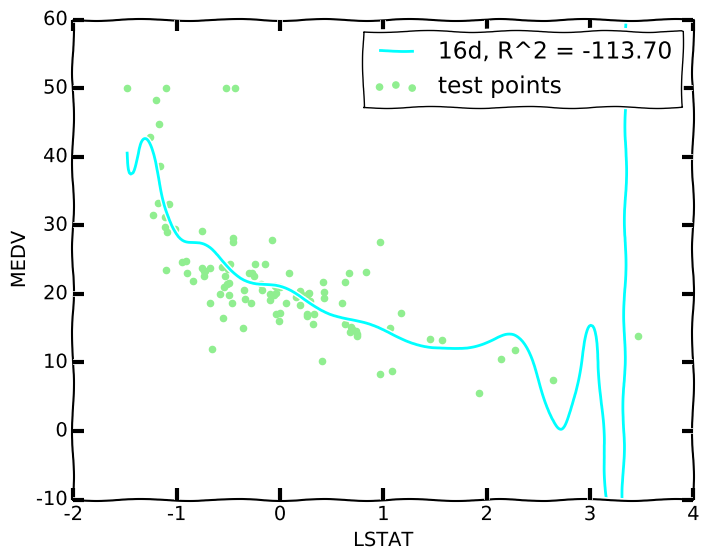

In [71]:
poly_16_prediction_curve = lreg_model.predict(poly_16.transform(X_range))
r2_score_16 = metrics.r2_score(y_test, lreg_model.predict(poly_16.transform(X_test[:,12:13])))

plt.figure()
plt.xkcd()
plt.scatter(X_test[:,12:13], y_test, label='test points', color='lightgreen')
plt.plot(X_range, poly_16_prediction_curve, label='16d, R^2 = %.2f' % r2_score_16, color='cyan', linestyle='-')
plt.xlabel ('LSTAT')
plt.ylabel('MEDV')
plt.ylim(-10,60)
plt.legend()
plt.show()

Now this is really an opportunity to demonstrate the power of regularization.

In [74]:
lasso_model_cv = linear_model.LassoCV(alphas=alphas, max_iter=100000)
lasso_model_cv.fit(X_train_lstat_poly_16, y_train)  
print('Coefficients: \n', lasso_model_cv.coef_)
eval_performance(lasso_model_cv, X_train_lstat_poly_16, y_train, poly_16.transform(X_test[:,12:13]), y_test)
print('Best Lasso alpha: {}\n'.format(lasso_model_cv.alpha_)) 

('Coefficients: \n', array([ -5.31880020e+00,  -7.27645630e-01,  -2.86955279e+00,
         2.53380544e+00,   0.00000000e+00,   2.00802665e-02,
        -7.22641086e-02,  -3.50960797e-02,   6.30938366e-03,
         2.97093575e-05,   7.26360173e-04,   8.62858731e-05,
         2.88272137e-05,  -9.53023263e-07,  -1.88642393e-06,
        -1.22442935e-06]))

Evaluating model: LassoCV(alphas=array([  1.00000e-05,   1.52642e-05,   2.32995e-05,   3.55648e-05,
         5.42868e-05,   8.28643e-05,   1.26486e-04,   1.93070e-04,
         2.94705e-04,   4.49843e-04,   6.86649e-04,   1.04811e-03,
         1.59986e-03,   2.44205e-03,   3.72759e-03,   5.68987e-03,
         8.68511e-03,   1...     1.20679e+03,   1.84207e+03,   2.81177e+03,   4.29193e+03,
         6.55129e+03,   1.00000e+04]),
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=100000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    ve

Not really great, but better than the unconstrained model ;-)

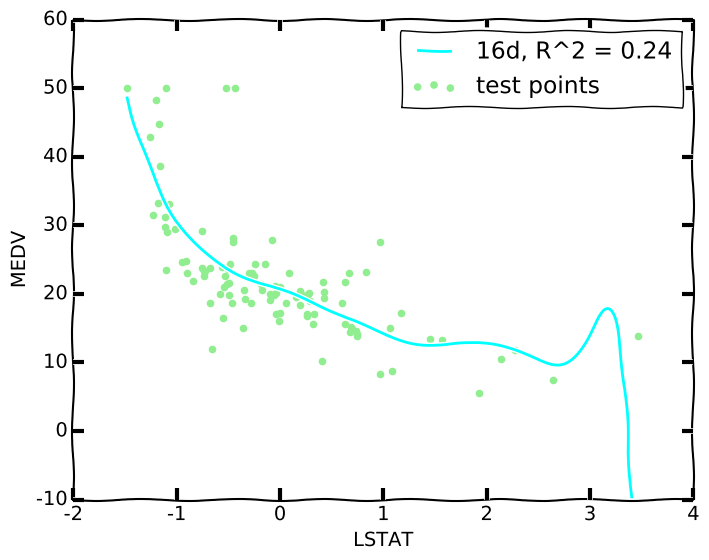

In [75]:
poly_16_prediction_curve = lasso_model_cv.predict(poly_16.transform(X_range))
r2_score_16 = metrics.r2_score(y_test, lasso_model_cv.predict(poly_16.transform(X_test[:,12:13])))

plt.figure()
plt.xkcd()
plt.scatter(X_test[:,12:13], y_test, label='test points', color='lightgreen')
plt.plot(X_range, poly_16_prediction_curve, label='16d, R^2 = %.2f' % r2_score_16, color='cyan', linestyle='-')
plt.xlabel ('LSTAT')
plt.ylabel('MEDV')
plt.ylim(-10,60)
plt.legend()
plt.show()

## Nonlinear models: k Nearest Neighbors

Finally, let's look at k Nearest Neighbors as an example of a nonlinear regressor.

In [76]:
from sklearn import neighbors
n_neighbors = [3,5,10,20]
weights = ['uniform', 'distance']

for n in n_neighbors:
  for w in weights:
    
    print('knn (n = {}, weights = {})\n'.format(n,w))
    knn_model = neighbors.KNeighborsRegressor(n, weights = w)
    knn_model.fit(X_train, y_train)
    eval_performance(knn_model, X_train, y_train, X_test, y_test)

knn (n = 3, weights = uniform)


Evaluating model: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')
Residual sum of squares (train): 2941
Residual sum of squares (test): 3430
MSE (train): 7.28
MSE (test): 33.63
R^2 (train): 0.91
R^2 (test): 0.59

knn (n = 3, weights = distance)


Evaluating model: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='distance')
Residual sum of squares (train): 0
Residual sum of squares (test): 3110
MSE (train): 0.00
MSE (test): 30.49
R^2 (train): 1.00
R^2 (test): 0.63

knn (n = 5, weights = uniform)


Evaluating model: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')
Residual sum of squares (train): 4991
Residual sum of squares (test): 3